In [29]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
##
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

In [9]:
##
submission = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
print(train.shape)

(25265, 12)


In [10]:
drop_cols = ['id']
cat_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
num_cols = [col for col in train.columns if col not in drop_cols+cat_cols]

In [11]:
train.loc[:, num_cols].describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,"22,336.00","25,265.00","20,373.00","25,264.00","25,264.00"
mean,64.83,59.89,52.06,1.34,45.76
std,32.93,23.02,28.37,1.10,27.14
min,5.00,20.00,0.01,0.00,0.00
25%,36.29,39.21,28.36,0.00,23.71
50%,64.31,60.08,53.13,1.00,43.95
75%,94.39,79.68,76.32,2.00,65.02
max,119.97,117.76,107.08,3.00,119.97


In [12]:
train.loc[:, cat_cols].describe(include='all')

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,25265,25265,25265,25265,25264,25264
unique,48,100,10,8,4,3
top,Tech Talks,Episode 62,Sports,Sunday,Night,Neutral
freq,759,368,2942,3903,6633,8549


In [23]:
#todo Wednesd Publication_Day

In [ ]:
#todo normalize num cols
#todo fillna with mean, KNN

In [64]:
s1 = train.isna().mean().sort_values(ascending=False)
s2 = test.isna().mean().sort_values(ascending=False)

pd.merge(s1.to_frame(), s2.to_frame(), left_index=True, right_index=True, how='outer', suffixes=['_train', '_test'])


,0_train,0_test
Episode_Length_minutes,0.12,0.11
Episode_Sentiment,0.00,0.00
Episode_Title,0.00,0.00
Genre,0.00,0.00
Guest_Popularity_percentage,0.19,0.19
Host_Popularity_percentage,0.00,0.00
Listening_Time_minutes,0.00,NaN
Number_of_Ads,0.00,0.00
Podcast_Name,0.00,0.00
Publication_Day,0.00,0.00


In [70]:
s1 = train['Episode_Title'].value_counts(normalize=True)
s2 = test['Episode_Title'].value_counts(normalize=True)

pd.merge(s1.to_frame(), s2.to_frame(), left_index=True, right_index=True, how='outer', suffixes=['_train', '_test'])


,proportion_train,proportion_test
Episode_Title,,
Episode 1,0.01,0.01
Episode 10,0.01,0.01
Episode 100,0.01,0.01
Episode 11,0.01,0.01
Episode 12,0.01,0.01
...,...,...
Episode 95,0.01,0.01
Episode 96,0.01,0.01
Episode 97,0.01,0.01


In [ ]:
#todo change types cat to category, num to int8 after normalization
#todo create separate file for data preparation

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Ads', ylabel='Density'>

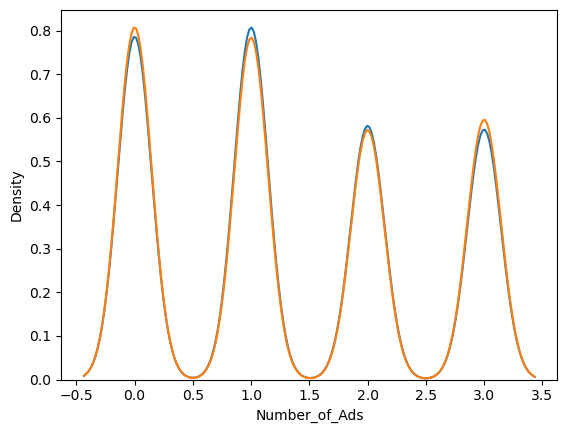

In [36]:
col = \
    'Number_of_Ads'
sns.kdeplot(x=train[col])
sns.kdeplot(x=test[col])